In [2]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Hypothesis Testing

In Data8.2x, you have been using simulation to conduct hypothesis testing. Now that we have completed Data8.2x, this is a good time to take a step back and reflect on hypothesis testing. 

Every hypothesis test has roughly the same structure. The following 4 steps provide a rough outline:

1) State the null and alternate hypotheses. Generally, the alternate hypothesis is what you are trying to show. Essentially, if you want to show a result, we assume the opposite is true and try to prove ourselves wrong. 

2) Determine/calculate a test statistic. See your book for a formal definition, but generally, the test statistic is any quantity that helps us evaluate our sample with respect to our null hypothesis. 

3) Determine distribution of test statistic and compute a $p$-value. If you have taken inferential statistics before, you likely computed a $z$ or $t$ statistic and used a calculator or table to compute a $p$-value. This is based on asymptotic theory of sample means/proportions. This is not the approach taken in Data8.2x. With better computing power, we can use simulation to obtain an empirical distribution of our test statistic under the null hypothesis. 

4) Conclude. For low $p$-value (generally below 0.05), we reject the null hypothesis. For high $p$-value, we fail to reject. Low $p$-value implies that our sample would be very unusual if the null hypothesis were actually true. Therefore, that is evidence that the null hypothesis is wrong. 

### Example

Let's work through an example. Suppose that in the upcoming election, Referendum A is up for approval in Colorado. You suspect that in El Paso County, more than half of eligible voters support the referendum. You collect a random sample of 200 eligible voters in El Paso County and 115 of them express support. Is there evidence to conclude that supports your suspicion? 

#### Step 1: Hypothesis

State the null and alternative hypotheses.

Alternative hypothesis: More than half of El Paso county support the referendum.

Null hypothesis: Less than or equal to half of El Paso county support the referendum.

#### Step 2: Test Statistic

Select a test statistic and compute that test statistic for the sample.

Test statistic: $X = $ the number of people out of 200 in favor of the referendum. If the null were true, $X=100$.

Test statistic for the sample: 
$X=115$

#### Step 3: $p$-value

3a) If $H_0$ were true, what should the value of $\hat{p}$ be close to? In other words, if in fact, half of eligible voters support the referendum, what value should your test statistic take? 

If the null were true, utilizing the test statistic, $\hat{p}$ should be close to .5. 

3b) In words (and in the context of this problem), describe what the $p$-value is. 

The value is the probability that 115 out of 200 support the referendum. Another interpretation is that given 200 samples, what is the probability that 115 say they support the referendum? The answer to that question is the p value we are looking for.

3c) Find the $p$-value directly and using simulation. Hint: the binomial distribution will be of use here. 

Assumptions: 
Assuming each vote is independent of the other (questionable assumption due to bandwagon effect).

Favor is ONLY yes or no (2 conditions)

Probability of a yes or no is equal for a given person. (50-50)

1.968


C:\Users\C20KarlErik.VanHegew\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


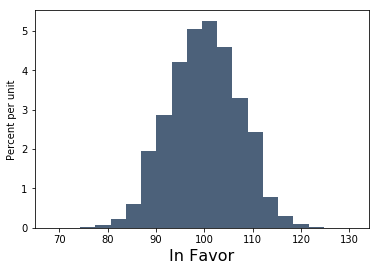

In [3]:
Simulations=100000
NumberInFavor=stats.binom.rvs(n=200,p=[.5],size=Simulations,loc=0) #probability of a succuessful outcome is 50%
P=sum(NumberInFavor>=115)/Simulations
TableInfavor=Table().with_column('In Favor',NumberInFavor)
TableInfavor.hist('In Favor',bins=20)
print(P*100)

In [4]:
1-stats.binom.cdf(k=114,n=200,p=.5,loc=0) #Probability of getting less than 115, then 1-ans=Probability of getting 115 or greater

0.020018595806698514

#### Step 4: Conclude

What is your conclusion? Be sure to state your conclusion in the context of the problem.

According to the binomial distribution established above, there is a 2% chance we could have achieved a 115 or greater for a sample size of 200. In conclusion, this is statistically significant enough to reject the null hypothesis that is, we reject the notion that less than or equal to half of the population of El Paso do not support the data.

An important consideration, however, is that we assumed that each vote is independent of the other and that there is a 50% of voting one way or the other. According to PEW, a random sampling of 2000 respondents will yield accurate representations of the Nation 95% of the time. So if we are to scale down, perhaps this is signficant. However, more data would yield better results.

## Confidence Intervals

Construct and interpret a 95% confidence interval on $p$, the true proportion of eligible El Paso County voters who support the referendum. There are many ways to construct such an interval (bootstrap, the binomial distribution, asymptotically). Select one and implement. 

Also, compare your interval to the results of your hypothesis test. Does your interval contain the value 0.5? Why does that matter? 

In [5]:
np.percentile(NumberInFavor,95)

112.0

In [14]:
[stats.binom.interval(.95,n=200,p=115/200,loc=0)]

[(101.0, 129.0)]

In [15]:
[101/200,129/200]

[0.505, 0.645]

Let's bootstrap this method.

In [29]:
values=np.repeat([0,1],[85,115])
Simulated=[]
for i in np.arange(1000):
    Simulated=np.append(Simulated,sum(np.random.choice(values,replace=True,size=200)))
fifthPercentile=np.percentile(a=Simulated,q=5) #5th percentile, or lower bound of the 95th percentile interval
fifthPercentile/200

0.51975

We can see from both methods that .5 is not include in the lower bound, because, if it was included, then we wouldn't be sufficiently able to reject the null hypothesis.